Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data

In [2]:
df=pd.read_csv("C:/Users/KIIT/Downloads/Github/Fish Prediction using NN/Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Getting insights from data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [6]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

# Exploratory Data Analysis(EDA)

<AxesSubplot:>

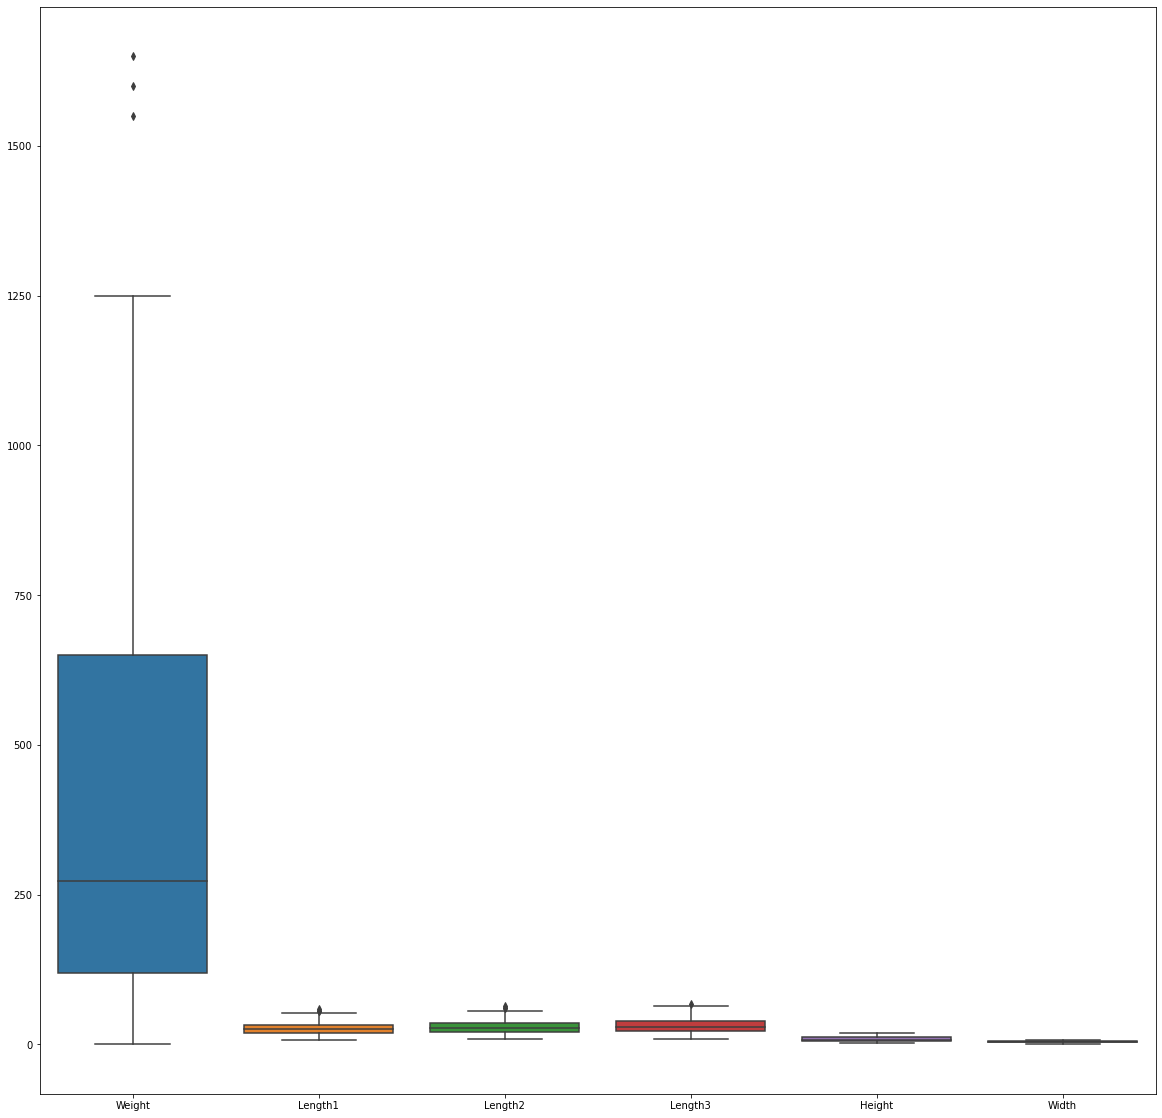

In [7]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df)

Thus we can see there is very few outliers so we can ignore it.

<AxesSubplot:>

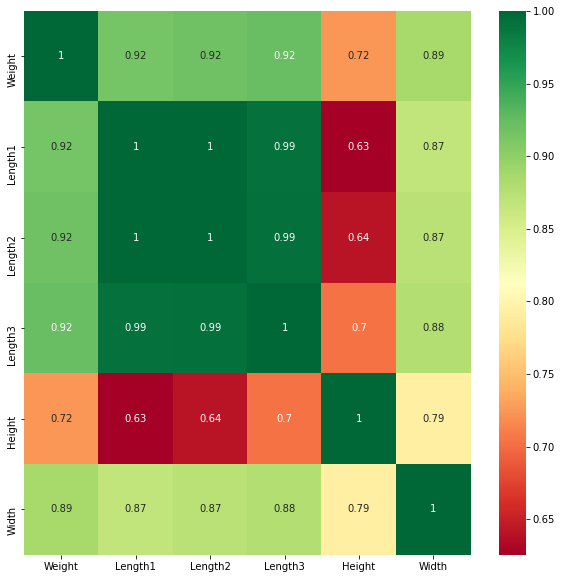

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

Thus from above we can see the correlations between various features.

array([[<AxesSubplot:xlabel='Weight', ylabel='Weight'>,
        <AxesSubplot:xlabel='Length1', ylabel='Weight'>,
        <AxesSubplot:xlabel='Length2', ylabel='Weight'>,
        <AxesSubplot:xlabel='Length3', ylabel='Weight'>,
        <AxesSubplot:xlabel='Height', ylabel='Weight'>,
        <AxesSubplot:xlabel='Width', ylabel='Weight'>],
       [<AxesSubplot:xlabel='Weight', ylabel='Length1'>,
        <AxesSubplot:xlabel='Length1', ylabel='Length1'>,
        <AxesSubplot:xlabel='Length2', ylabel='Length1'>,
        <AxesSubplot:xlabel='Length3', ylabel='Length1'>,
        <AxesSubplot:xlabel='Height', ylabel='Length1'>,
        <AxesSubplot:xlabel='Width', ylabel='Length1'>],
       [<AxesSubplot:xlabel='Weight', ylabel='Length2'>,
        <AxesSubplot:xlabel='Length1', ylabel='Length2'>,
        <AxesSubplot:xlabel='Length2', ylabel='Length2'>,
        <AxesSubplot:xlabel='Length3', ylabel='Length2'>,
        <AxesSubplot:xlabel='Height', ylabel='Length2'>,
        <AxesSubplot:xlabel=

<Figure size 7200x3600 with 0 Axes>

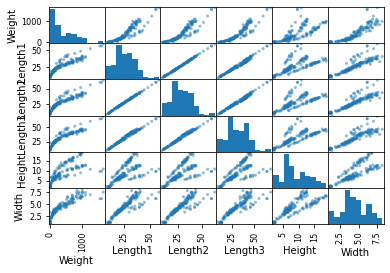

In [9]:
from pandas.plotting import scatter_matrix
plt.figure(figsize=(100,50))
scatter_matrix(df)

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Species', ylabel='count'>

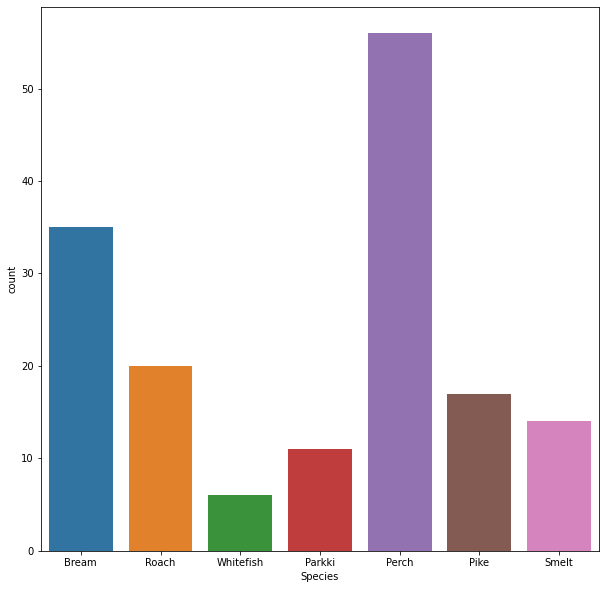

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(df['Species'])

So, from above we can conclude the data has maximum perch samples followed by bream

In [11]:
features=['Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width']

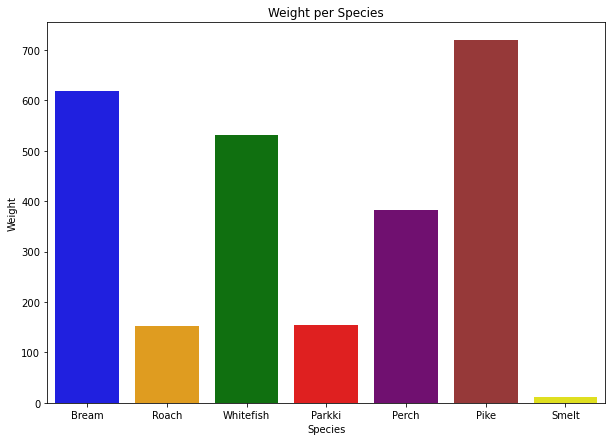

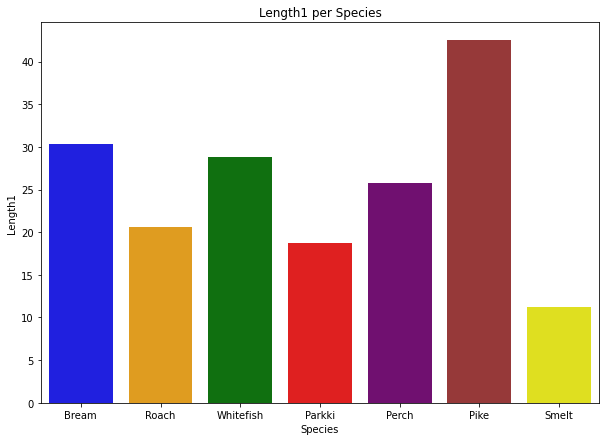

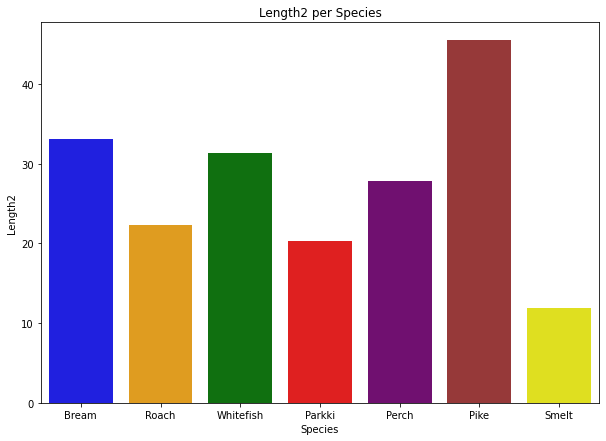

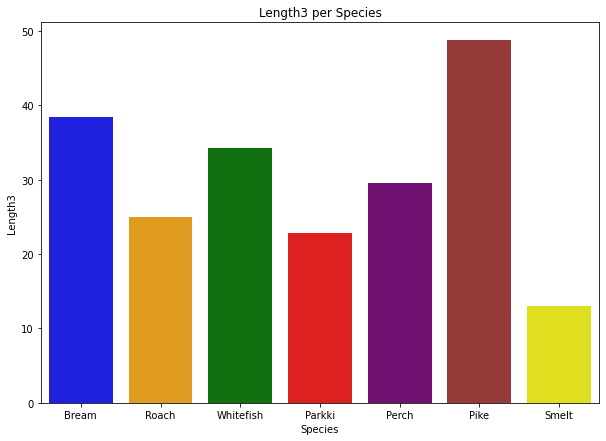

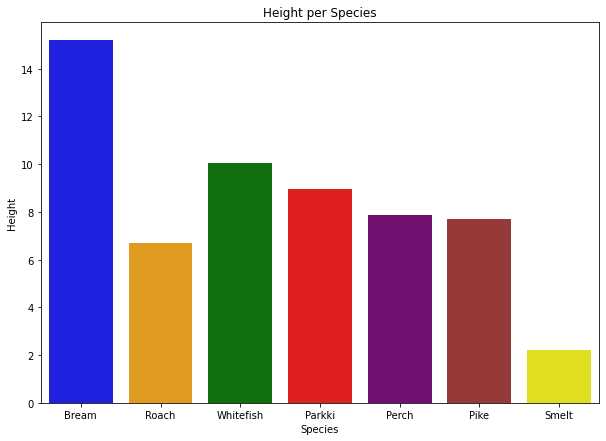

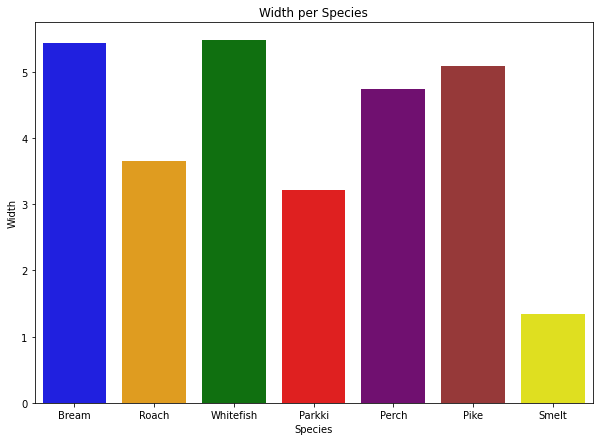

In [12]:
for c in features:
    plt.figure(figsize=(10,7))
    sns.barplot(y=c, x='Species', data=df, palette = {'Bream':'blue', 'Roach':'orange', 
    'Whitefish':'Green', 'Parkki':'red', 'Perch':'purple', 'Pike':'brown', 'Smelt':'yellow'},ci=None)
    plt.title('{} per Species'.format(c))
    plt.show()

# Now,lets begin creating our NN model

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import SGD

In [14]:
df['Species'] = df['Species'].map({'Bream':0, 'Roach':1, 'Whitefish':2, 'Parkki':3, 'Perch':4, 'Pike':5, 'Smelt':6})

mapping into int values to feed into the network

In [15]:
print(df)
df_train=df.sample(frac=0.8,random_state=42)#creating training set
df_valid=df.drop(df_train.index)#creating validation set

     Species  Weight  Length1  Length2  Length3   Height   Width
0          0   242.0     23.2     25.4     30.0  11.5200  4.0200
1          0   290.0     24.0     26.3     31.2  12.4800  4.3056
2          0   340.0     23.9     26.5     31.1  12.3778  4.6961
3          0   363.0     26.3     29.0     33.5  12.7300  4.4555
4          0   430.0     26.5     29.0     34.0  12.4440  5.1340
..       ...     ...      ...      ...      ...      ...     ...
154        6    12.2     11.5     12.2     13.4   2.0904  1.3936
155        6    13.4     11.7     12.4     13.5   2.4300  1.2690
156        6    12.2     12.1     13.0     13.8   2.2770  1.2558
157        6    19.7     13.2     14.3     15.2   2.8728  2.0672
158        6    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [16]:
df_train

,Species,Weight,Length1,Length2,Length3,Height,Width
78,4,78.0,16.8,18.7,19.4,5.1992,3.1234
155,6,13.4,11.7,12.4,13.5,2.4300,1.2690
128,5,200.0,30.0,32.3,34.8,5.5680,3.3756
55,2,270.0,23.6,26.0,28.7,8.3804,4.2476
94,4,150.0,21.0,23.0,24.5,5.2185,3.6260
...,...,...,...,...,...,...,...
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
17,0,700.0,30.4,33.0,38.5,14.9380,5.1975
38,1,87.0,18.2,19.8,22.2,5.6166,3.1746
72,4,5.9,7.5,8.4,8.8,2.1120,1.4080


In [17]:
df_valid

,Species,Weight,Length1,Length2,Length3,Height,Width
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
6,0,500.0,26.8,29.7,34.5,14.1795,5.2785
14,0,600.0,29.4,32.0,37.2,14.9544,5.1708
20,0,575.0,31.3,34.0,39.5,15.1285,5.5695
21,0,685.0,31.4,34.0,39.2,15.9936,5.3704
37,1,78.0,17.5,18.8,21.2,5.5756,2.9044
48,1,169.0,22.0,24.0,27.2,7.5344,3.8352
50,1,200.0,22.1,23.5,26.8,7.3968,4.1272
52,1,290.0,24.0,26.0,29.2,8.8768,4.4968
54,1,390.0,29.5,31.7,35.0,9.4850,5.3550


If we want to scale the data using max-min

#max_ = df_train.max(axis=0)

#min_ = df_train.min(axis=0)

#df_train = (df_train - min_) / (max_ - min_)

#df_valid = (df_valid - min_) / (max_ - min_)

In [18]:
#Making our data into more usuable form to feed into our network.
X_train = df_train.drop('Species', axis=1)
X_valid = df_valid.drop('Species', axis=1)
'''
Scaling the data using max-min if you want.
I've not included 'Species' because its a classification problem
max_ = X_train.max(axis=0)
min_ = X_train.min(axis=0)
X_train = (X_train - min_) / (max_ - min_)
X_valid = (X_valid - min_) / (max_ - min_)
'''
from keras.utils import to_categorical
y_train = to_categorical(df_train['Species'])
y_valid = to_categorical(df_valid['Species'])
#y_train = df_train['Species']
#y_valid = df_valid['Species']

In [19]:
y_train

array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
 

In [24]:
#Creating our model with 3 hidden layers and 1 output layer with each layer having 128units
opt1=SGD(lr=0.01,momentum=0.9)#defining our optimiser
from keras.optimizers import RMSprop
opt2=RMSprop(lr=0.01)
mdl=keras.Sequential([
    layers.BatchNormalization(input_shape=[6]),
    layers.Dense(128, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(7,activation='softmax'),
])
#Adding features to our model
mdl.compile(
     optimizer='adam',#or opt1 or opt2.I've used  after testing as it gives best result.
    loss='categorical_crossentropy',#since it is the best classification loss evaluation metrics
    metrics=['accuracy']#since we're doing classification we need to check the model's accuracy
)
#Creating early stopping to stop training to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Minimum validation loss: 0.283
Maximum validation accuracy: 0.906


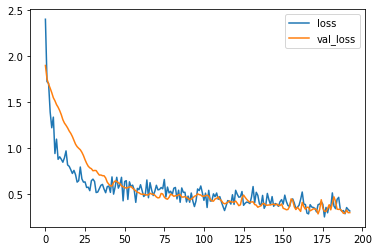

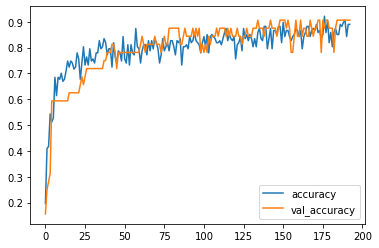

In [25]:
#Fitting/Trainig our created model
new_history = mdl.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=18,
    epochs=200,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

new_history_df = pd.DataFrame(new_history.history)
new_history_df.loc[:, ['loss', 'val_loss']].plot();
new_history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
print("Minimum validation loss: {:.3f}".format(new_history_df['val_loss'].min()))
print("Maximum validation accuracy: {:.3f}".format(new_history_df['val_accuracy'].max()))

Thus we can see we've a pretty good model after changing learning rates and testing on various epochs and batch sizes.

In [28]:
df1=df.drop(['Species'],axis=1)
y=df['Species']

In [29]:
np.argmax(mdl.predict(df1),axis=-1)#or mdl.predict_classes(df1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 4, 6], dtype=int64)

In [30]:
print(np.array(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6
 6 6 6 6 6 6 6 6 6 6 6]


Thus from above we can see the model's predicition is almost accurate about 90%.

In [31]:
y=to_categorical(y)

Let's calculate our model's accuracy.

In [32]:
_, accuracy = mdl.evaluate(df1, y,batch_size=10, verbose=0)
print(f"The accuracy of our model is {accuracy*100 :.2f}%")

The accuracy of our model is 94.34%


In [33]:
mdl.save("fishmodel.h5")#saving the model

# Prediction using our created model

In [34]:
def predictions(x):
    labels={'Bream':0, 'Roach':1, 'Whitefish':2, 'Parkki':3, 'Perch':4, 'Pike':5, 'Smelt':6}
    pred=np.argmax(mdl.predict(x),axis=-1)
    for k,v in labels.items():
        if v==pred:
            return k
def ip():
    i1=float(input("Enter Weight :"))
    i2=float(input("Enter Length1 :"))
    i3=float(input("Enter Length2 :"))
    i4=float(input("Enter Length3 :"))
    i5=float(input("Enter Height :"))
    i6=float(input("Enter Width :"))
    inp=pd.DataFrame([i1,i2,i3,i4,i5,i6],index=['Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width']).transpose()
    print("Your input is-")
    print(inp)
    pr=predictions(inp)
    print("The predicted species is: ")
    print(pr)

In [38]:
ip()

Enter Weight :1500
Enter Length1 :55
Enter Length2 :58
Enter Length3 :60
Enter Height :13
Enter Width :5
Your input is-
   Weight  Length1  Length2  Length3  Height  Width
0  1500.0     55.0     58.0     60.0    13.0    5.0
The predicted species is: 
Pike


In [39]:
df.query('Species ==5 and Weight>1000') #since pike is labelled as 5

,Species,Weight,Length1,Length2,Length3,Height,Width
141,5,1250.0,52.0,56.0,59.7,10.6863,6.9849
142,5,1600.0,56.0,60.0,64.0,9.6000,6.1440
143,5,1550.0,56.0,60.0,64.0,9.6000,6.1440
144,5,1650.0,59.0,63.4,68.0,10.8120,7.4800


Thus, our model predicted correctly.